In [1]:
from turtledemo.minimal_hanoi import Tower

import numpy as np

from ch03.Chapter3 import accuracy_cnt


# 오차 제곱합
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [3]:
# 미니 배치 학습
import numpy as np
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


# one hot encoding cross entropy error function
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = t.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


(60000, 784)
(60000, 10)


질문 : 왜 손실 함수를 설정하는가? <br>
대답 : 학습된 모델의 정확도를 파악할 수 있는 지표가 필요한데 그 기준이 되는 매개변수를 찾기 위함이다

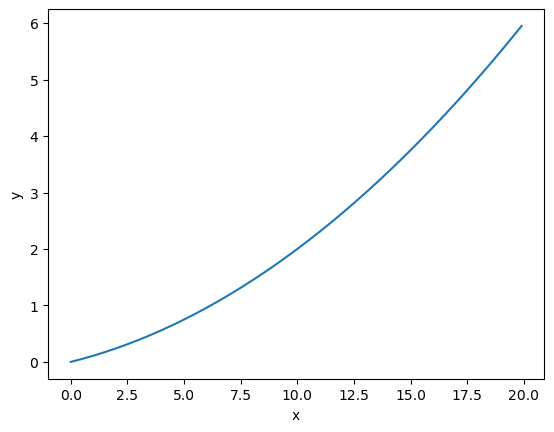

In [4]:
## 미분 함수 구현
import matplotlib.pyplot as plt


def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


# 특정 함수 f(x) = 0.01*x^2 + 0.1*x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x


def draw(function, x):
    y = function(x)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y)
    plt.show()


x = np.arange(0.0, 20.0, 0.1)

draw(function_1, x)

In [5]:
a = numerical_diff(function_1, 5)
b = numerical_diff(function_1, 10)

print(a, b)

0.1999999999990898 0.2999999999986347


In [6]:
from typing import Callable


# 편미분 함수

def function_2(x):
    return x[0] ** 2 + x[1] ** 2


def numerical_gradient(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp = x[idx]

        x[idx] = tmp + h
        fxh1 = f(x)

        x[idx] = tmp - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp  # 값 복원
    return grad


a = numerical_gradient(function_2, np.array([3.0, 4.0]))
b = numerical_gradient(function_2, np.array([0.0, 2.0]))
c = numerical_gradient(function_2, np.array([3.0, 0.0]))

print(a, b, c)

[6. 8.] [0. 4.] [6. 0.]


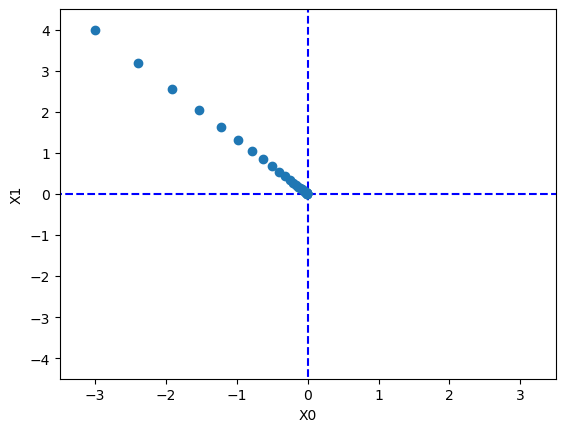

In [20]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)


def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 30
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [34]:
# 신경망에서 기울기
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss


net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(f"predict : {p}")

print(f"max value index : {np.argmax(p)}")
t = np.array([0, 0, 1])
net.loss(x, t)

f = lambda W: net.loss(x, t)

dw = numerical_gradient(f, net.W)

print(f"down gradient : {dw}")


[[ 0.27641772 -0.51547322 -1.65277203]
 [ 0.42487011  0.53207106  0.27357001]]
predict : [ 0.54823373  0.16958002 -0.74545021]
max value index : 0
down gradient : [[ 0.30627204  0.2097298  -0.51600184]
 [ 0.45940806  0.3145947  -0.77400276]]


In [35]:
# 2층 신경망 구현
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {
            'W1': weight_init_std * np.random.randn(input_size, hidden_size),
            'b1': np.zeros(hidden_size),
            'W2': weight_init_std * np.random.randn(hidden_size, output_size),
            'b2': np.zeros(output_size)
        }

    def predict(self, x):
        w1, w2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, w1) + b1  # 1층
        z1 = sigmoid(a1)
        a2 = np.dot(z1, w2) + b2  # 2층
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)  # 예측 결과들
        t = np.argmax(t, axis=1)  # 테스트 결과들
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_w = lambda _: self.loss(x, t)

        # 결국 가중치를 학습시키기 위해서 이기 때문에 경사하강법으로 가중치를 변경하는 작업이 필요하다
        grads = {
            'W1': numerical_gradient(loss_w, self.params['W1']),
            'b1': numerical_gradient(loss_w, self.params['b1']),
            'W2': numerical_gradient(loss_w, self.params['W2']),
            'b2': numerical_gradient(loss_w, self.params['b2']),
        }
        return grads


net = TwoLayerNet(input_size=28 * 28, hidden_size=100, output_size=10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
# 미니배치 학습 구현하기
import numpy as np
from dataset.mnist import  load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=28 * 28, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    # 랜덤 배치 마스크 생성
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 편향된 가중치 구하기
    grad = network.numerical_gradient(x_batch, t_batch)

    # 편향된 가중치 제거
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 손실 함수 구하기
    loss = network.loss(x_train, t_train)
    train_loss_list.append(loss)

# print(train_loss_list)
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.xlim(0, 10000)
plt.show()


  0%|          | 3/10000 [01:51<103:16:52, 37.19s/it]


KeyboardInterrupt: 